# INCOME GRABBER STRATEGY 

### TODO:
- get data (data supose to be updated every day, test on archival data)
- write functions generating points for <b>long</b> and <b>short</b> positions 
- function calculating expected income 
- hyperparameters optymalization 

### long position function 
- inputs time for taking average (can be <b>dinamic TODO </b>) and centyl of gain (in day or period (?))
-- what padding ? 
- function calcutates avrage and variation of signal in given period and centyl of last gain 
- if centyl is high enugh we consider is as a long position point 

#### OR
- gain have to be a given percent of value 

### short position function 
- very naive aproach... get maximas for gaussian filtered signal 

### expected income 
- just calculate difference between prices in long and closest short position 

### optymalization: 
- grid search of hyperparameters optymalizing avrage expected income (save one) or total expected income (global)

## ISSUES :
- how to define importance of point ?? which are risky and which are stable ? 

In [4]:
#boring imports... nothing interesting

%load_ext autoreload
%autoreload 2

import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from  ig_utilities import *
from tqdm import tqdm 
from datetime import datetime, timedelta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GET DATA
### FOR TEST JUST ARCHIVAL 

In [2]:
### read names of data files (remember to write proper name) 
directory = "./main_data"
file_names = os.listdir(directory)

### ugly data read.. we will do nicer when i find out some structure of this project 
name = file_names[90]
path = os.path.join(directory, name) 
data = pd.read_csv(path, sep = "\t", index_col = "Data")
#data = pd.read_csv(path, sep = "\t", index_col = 0)

## Grid search 

Searching for the best parameters

In [3]:
sigmas = np.linspace(2,2.6,3)
window_sizes = np.arange(2,12,1)
print(sigmas)
print(window_sizes)

[2.  2.3 2.6]
[ 2  3  4  5  6  7  8  9 10 11]


In [4]:
spolka = []

for name in tqdm(file_names[:10]):
    path = os.path.join(directory, name) 
    data = pd.read_csv(path, sep = "\t", index_col = "Data")

    results = {"sigma": [],
              "window_size": [],
              "income": [],
              "avg_income": []}

    for sig in sigmas: 
        for win in window_sizes:
            inc = income_grabber(data, window_size = win, n_sigma = sig)
            results["sigma"].append(sig)
            results["window_size"].append(win)
            results["income"].append(np.array(inc))
            results["avg_income"].append(np.mean(inc))
    spolka.append(results)

  0%|          | 0/10 [00:00<?, ?it/s]/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/li

/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_

/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_

/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_

/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_

/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_

 80%|████████  | 8/10 [00:35<00:07,  3.57s/it]/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/

/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_

In [5]:
mean_inc = []
inc_len = []
for inc in results["income"]:
    mean_inc.append(np.mean(inc))
    inc_len.append(len(inc))

/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


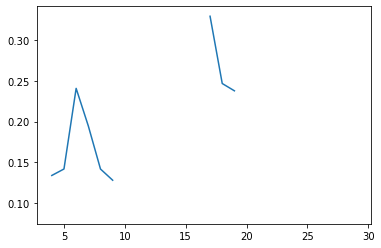

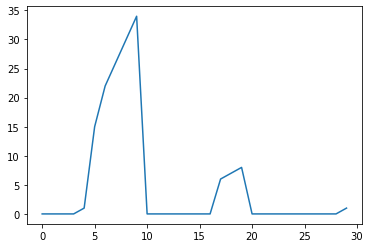

In [6]:
plt.plot(mean_inc)
plt.show()
plt.plot(inc_len)
plt.show()


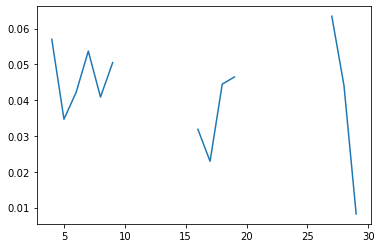

In [7]:
plt.plot(spolka[0]["avg_income"])

In [9]:
cum_incomes = np.zeros(len(spolka[0]["avg_income"]))
cum_total_incomes = np.zeros(len(spolka[0]["avg_income"]))
#remove nans: 
for ii, spola in enumerate(spolka):
    tmp = np.array(spola["avg_income"])
    tmp[np.isnan(tmp)] = 0 
    cum_incomes += tmp
    
    tmp_total = []
    for incomes in spola["income"]:
        tmp_total.append(np.median(incomes))
    tmp_total = np.array(tmp_total)
    tmp_total[np.isnan(tmp_total)] = 0
    cum_total_incomes += tmp_total
cum_total_incomes = cum_total_incomes/ len(spolka)
cum_incomes = cum_incomes/ len(spolka)

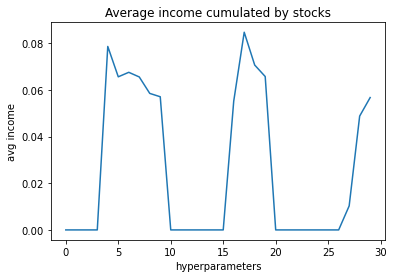

Text(0.5, 0, 'hyperparameters')

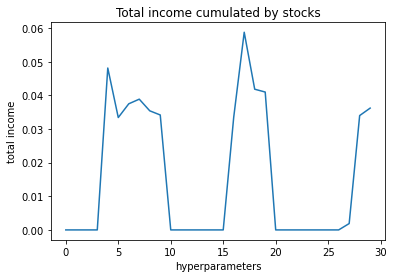

In [10]:
plt.plot(cum_incomes)
plt.title("Average income cumulated by stocks")
plt.ylabel("avg income")
plt.xlabel("hyperparameters")
plt.show()
plt.plot(cum_total_incomes)
plt.title("Total income cumulated by stocks")
plt.ylabel("total income")
plt.xlabel("hyperparameters")

In [22]:
best = np.argmax(cum_incomes)
print(best)
sig = spolka[0]["sigma"][best]
win = spolka[0]["window_size"][best]
print("best sigma:", sig)
print("best window:", win)

17
best sigma: 2.3
best window: 9


# Test for Patrick predicted params`

In [ ]:
name = file_names[8]
path = os.path.join(directory, name) 
data = pd.read_csv(path, sep = "\t", index_col = "Data")
inc = income_grabber(data,n_sigma = 2, window_size = 6*30 ,plot = True)

In [13]:
incs = []
for name in tqdm(file_names):
    path = os.path.join(directory, name) 
    data = pd.read_csv(path, sep = "\t", index_col = "Data")
    
    inc = income_grabber(data,n_sigma = 2, window_size = 30*6 ,plot = False)
    incs.append(inc)

100%|██████████| 397/397 [00:58<00:00,  6.75it/s]


In [14]:
median_incs = np.zeros(len(incs))
sum_incs = np.zeros(len(incs))
for ii, inc in enumerate(incs):
    median_incs[ii] = np.median(inc)
    sum_incs[ii] = np.sum(inc)

/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/szlupek/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
best = np.argmax(median_incs)
worst = np.argmin(median_incs)
print(np.max(median_incs),np.min(median_incs))
print(best,worst)

0.6238678351655156 -0.15620547431571058
201 110


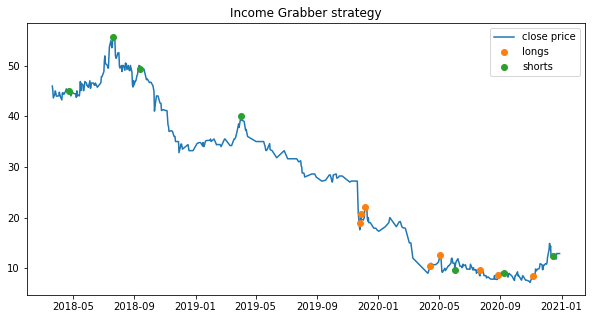

In [17]:
name = file_names[worst]
path = os.path.join(directory, name) 
data = pd.read_csv(path, sep = "\t", index_col = "Data")
inc = income_grabber(data,n_sigma = 2, window_size = 6*30 ,plot = True)

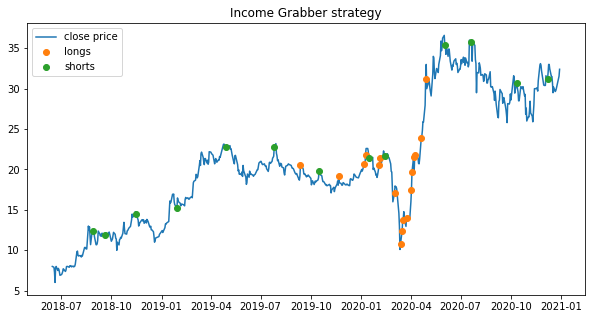

In [18]:
name = file_names[best]
path = os.path.join(directory, name) 
data = pd.read_csv(path, sep = "\t", index_col = "Data")
inc = income_grabber(data,n_sigma = 2, window_size = 6*30 ,plot = True)

In [19]:
best = np.argmax(sum_incs)
worst = np.argmin(sum_incs)
print(np.max(sum_incs),np.min(sum_incs))
print(best,worst)

298.1941398218034 -6.835259632240174
97 11


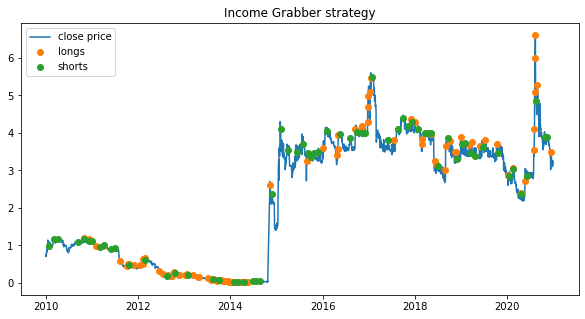

In [20]:
name = file_names[worst]
path = os.path.join(directory, name) 
data = pd.read_csv(path, sep = "\t", index_col = "Data")
inc = income_grabber(data,n_sigma = 2, window_size = 6*30 ,plot = True)

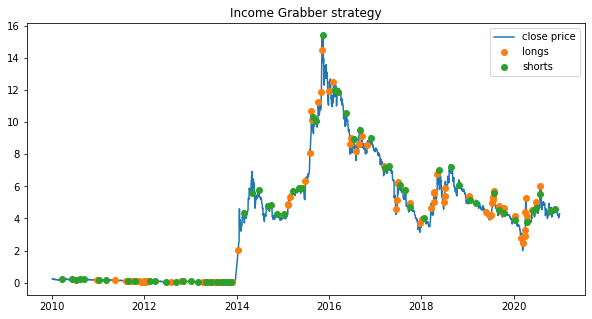

In [21]:
name = file_names[best]
path = os.path.join(directory, name) 
data = pd.read_csv(path, sep = "\t", index_col = "Data")
inc = income_grabber(data,n_sigma = 2, window_size = 6*30 ,plot = True)

# Proper INCOM GRABBER INDICATOR
### Idea:
- TODO update data
- calculate mean form given window 
- indicate IG signal 

signal for: SEN at ['2021-01-28']
signal for: APR at ['2021-01-28']
signal for: CDR at ['2021-01-28']
signal for: ZUE at ['2021-01-28']
signal for: BRA at ['2021-01-28']
['SEN', 'APR', 'CDR', 'ZUE', 'BRA']


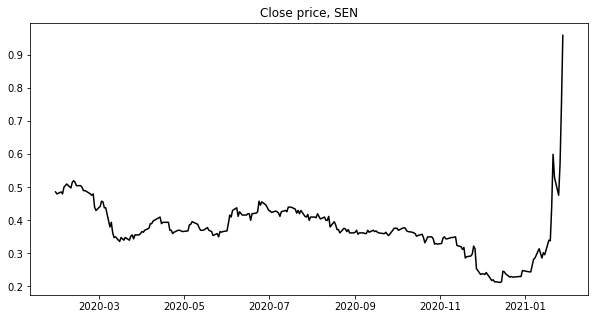

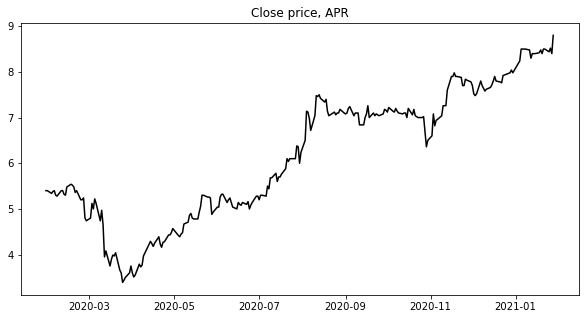

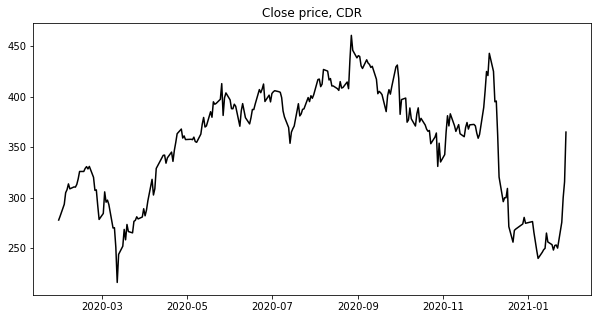

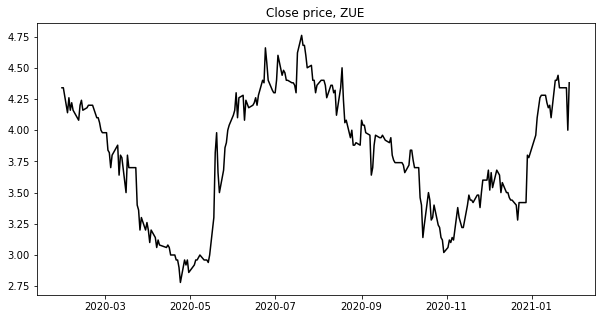

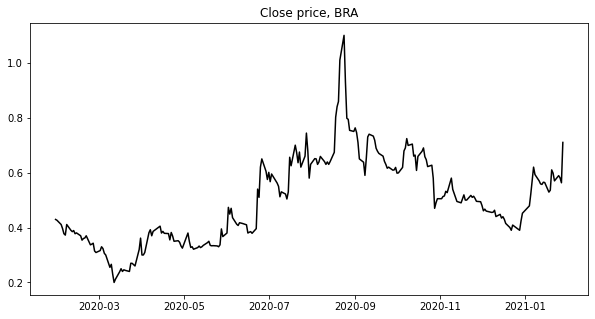

In [3]:
### read names of data files (remember to write proper name) 
directory = "./main_data"
file_names = os.listdir(directory)


intresting = []

for name in file_names:
    path = os.path.join(directory, name)
    data = pd.read_csv(path, sep = "\t", index_col = "Data")
    inpuls, dates_of_inpulse = ig_indicator(data,window_size = 90, n_sigma = 2, 
                                            short = False, passed_days_to_check = 0)
    if inpuls:
        print(f"signal for: {name[:-4]} at {dates_of_inpulse}")
        plot_last_year(data, name[:-4], save = True, show_plot = False)
        intresting.append(name[:-4])
print(intresting)

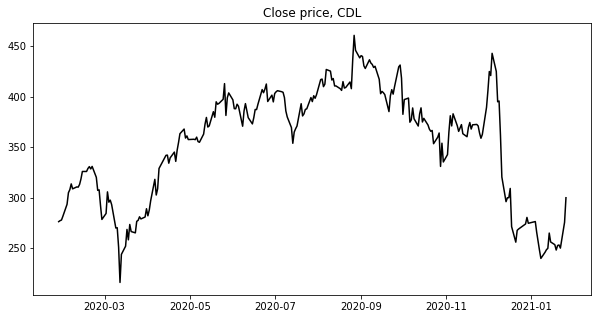

100%|██████████| 14/14 [00:00<00:00, 71.38it/s]

found impuls for window:13, sigma: 1.5
found impuls for window:17, sigma: 1.5
found impuls for window:21, sigma: 1.5
found impuls for window:25, sigma: 1.5
found impuls for window:29, sigma: 1.5
found impuls for window:33, sigma: 1.5
found impuls for window:37, sigma: 1.5
found impuls for window:41, sigma: 1.5
found impuls for window:45, sigma: 1.5
found impuls for window:49, sigma: 1.5
found impuls for window:53, sigma: 1.5
found impuls for window:57, sigma: 1.5


In [27]:
### Plaing with parameters 

win_size = 30
n_sigma = 1.5
plot_last_year(data, name[:-4])
for win_size in tqdm(np.arange(5,60,4)):
    #for n_sigma in np.linspace(1,2.5,10):
    path = os.path.join(directory, "CDR.tsv") 
    data = pd.read_csv(path, sep = "\t", index_col = "Data")
    inpuls, dates_of_inpulse = ig_indicator(data, window_size = win_size, n_sigma= n_sigma)
    if inpuls:
        print(f"found impuls for window:{win_size}, sigma: {n_sigma}")
    



signal for: SEN at ['2021-01-28']
signal for: APR at ['2021-01-28']
signal for: CDR at ['2021-01-28']
signal for: ZUE at ['2021-01-28']
signal for: BRA at ['2021-01-28']


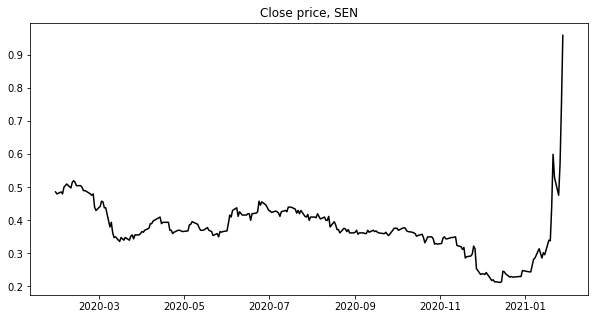

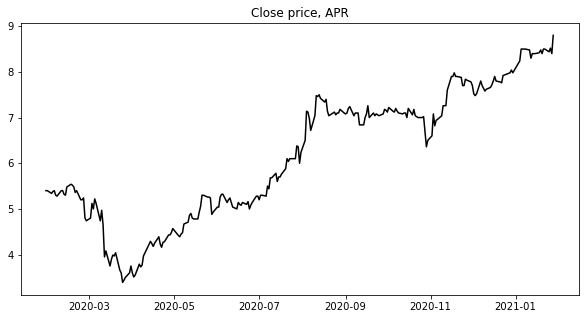

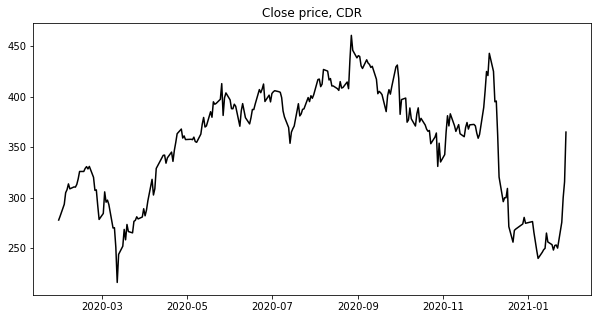

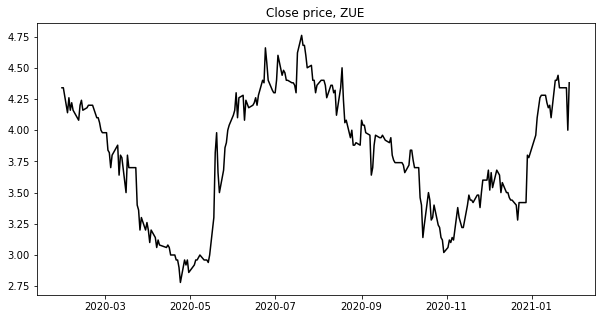

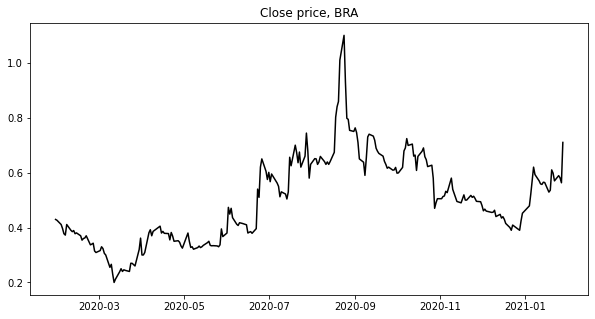

In [8]:
a = multi_ig_indicator()

In [9]:
a

['SEN', 'APR', 'CDR', 'ZUE', 'BRA']